## Making activity spaces using open source Python libraries

Here we will try making activity space models directly from within Python enviornment. The code used here used open source Python libraries only. 

**Setting the paths**

As a first step (and a good coding practice) let's clearly define our paths so that we do not run into issues while working with data.

In [30]:
import pathlib
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [42]:
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
output_DIRECTORY = NOTEBOOK_PATH / "output"
raster_DIRECTORY = NOTEBOOK_PATH / "output/raster"

# paths to our data and outputs:
home_file = DATA_DIRECTORY / "home20.shp"
activity_file = DATA_DIRECTORY / "eep20.shp"
output_file = output_DIRECTORY /"Output.gpkg"
route_file = DATA_DIRECTORY /"shortest_routes.shp"
temp_DIRECTORY = NOTEBOOK_PATH / "output" / "temp"

**Loading data**

Now let's load our home data as a geodataframe and project to a suitable CRS. Then we take a quick look at data.

In [3]:
gdf_home = gpd.read_file(home_file)
gdf_home=gdf_home.to_crs("EPSG:3067")

In [4]:
gdf_home.head()

,Respondent,Publicatio,Submitted,Submitte_1,First_Acti,Last_Activ,Publicat_1,Participat,Approved_B,Hidden_By,...,Processed,Language,Index,Zoom,geojson,geo_point,uid,uid2,NO_mks,geometry
0,23ri4ytx8yf9,4uk8ak4mh3bn,1,2023-09-22,2023-09-22,2023-09-22,1,1,0,0,...,0,fi,0,"13,18","{""type"":""Feature"",""geometry"":{""type"":""Point"",""...","64.95395,25.537732",377296,377296,5.0,POINT (430930.447 7204120.973)
1,2pb4zsb8n2h3,4uk8ak4mh3bn,1,2023-09-21,2023-09-21,2023-09-21,1,1,0,0,...,0,fi,0,"13,6","{""type"":""Feature"",""geometry"":{""type"":""Point"",""...","65.0845,25.385182",661257,661257,5.0,POINT (424097.690 7218842.142)
2,2r48lmh3fk2b,4uk8ak4mh3bn,1,2023-09-21,2023-09-21,2023-09-21,1,1,0,0,...,0,fi,0,"16,27","{""type"":""Feature"",""geometry"":{""type"":""Point"",""...","65.002527,25.483709",571825,571825,5.0,POINT (428508.898 7209593.645)
3,2uh34x2d7jh7,4uk8ak4mh3bn,1,2023-09-24,2023-09-24,2023-09-24,1,1,0,0,...,0,fi,0,"16,35","{""type"":""Feature"",""geometry"":{""type"":""Point"",""...","65.046904,25.485355",33629,33629,5.0,POINT (428705.012 7214536.418)
4,2xn8vyc7uco8,4uk8ak4mh3bn,1,2023-10-11,2023-10-11,2023-10-11,1,1,0,0,...,0,fi,0,"15,22","{""type"":""Feature"",""geometry"":{""type"":""Point"",""...","64.97659,25.259714",192392,192392,5.0,POINT (417870.218 7206975.922)


<Axes: >

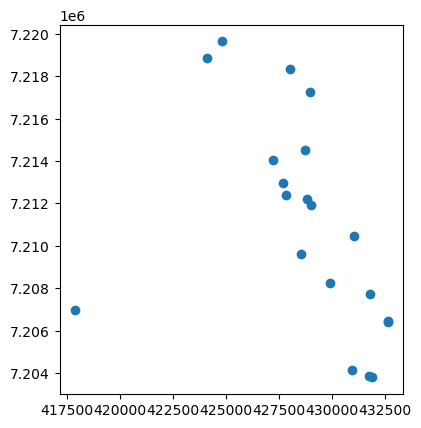

In [6]:
gdf_home.plot()

C:\Users\kamya\miniconda3\envs\autogis\lib\site-packages\geopandas\plotting.py:314: UserWarning: You passed a edgecolor/edgecolors ('purple') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


<Axes: >

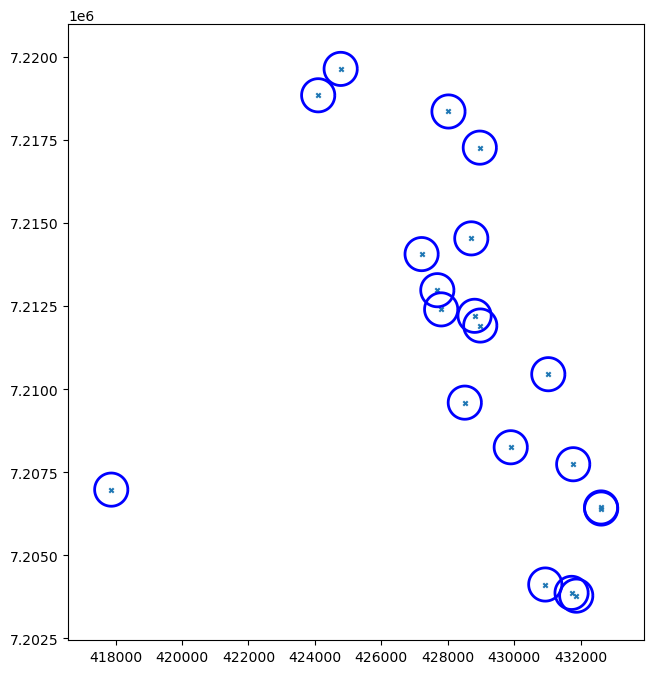

In [28]:
buffer_distance = 500
buffered_home = gpd.GeoDataFrame(geometry=gdf_home['geometry'].buffer(buffer_distance), crs=gdf_home.crs)
ax = buffered_home.plot(marker='o', color='white', markersize=100, figsize=(8, 8))
buffered_home.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)
gdf_home.plot(ax=ax, edgecolor='purple', markersize=10, marker='x')

Now let's use the activity space modelers. First we will try the home range model. There is a function in the main.py file called "nb_withRoute". This function creates a home range model by also taking the routes into account. let's call the function and provide the inputs:

In [34]:
from main import nb_withRoute
#nb_withRoute(home_file, activity_file, route_file, output_file, uid_field, D1, D2)
nb_withRoute(home_file, activity_file, route_file, output_file, "uid", 500, 200)

C:\developerZone\teachingclones\ActivitySpace-teaching\data\home20.shp


In [38]:
# Lets load the houput and take a look at it
home_range = gpd.read_file(output_DIRECTORY / "Output.gpkg")
home_range.head()


,uid,geometry
0,377296,"POLYGON ((430815.266 7198665.467, 430814.263 7..."
1,661257,"POLYGON ((430144.648 7204784.778, 430143.630 7..."
2,571825,"POLYGON ((428107.185 7209019.235, 428087.582 7..."
3,33629,"POLYGON ((427904.997 7212476.568, 427885.394 7..."
4,192392,"POLYGON ((424431.717 7201937.833, 424412.113 7..."


<Axes: >

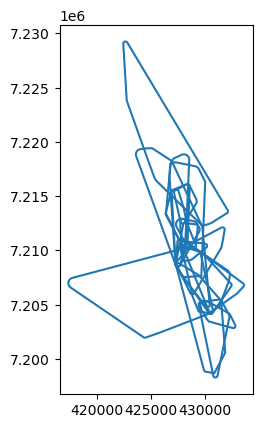

In [39]:
home_range.boundary.plot()